# Data Cleaning – Credit Card Churn Dataset
This notebook performs initial data cleaning on the raw credit card churn dataset.  
The goal is to prepare the dataset for EDA and modeling by:
- Removing duplicates
- Handling missing values
- Fixing data types
- Addressing outliers
- Managing high-cardinality categorical features  
The cleaned dataset will be saved in `data/processed/` for use in later stages.

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Reproducibility
np.random.seed(42)

In [2]:
# Paths
DATA_DIR = Path("../../data/raw")
FILE_PATH = DATA_DIR / "credit_card_attrition_dataset_mark.csv" 

In [3]:
# Load
df = pd.read_csv(FILE_PATH)

## 1. Looking at the Dataset

In [4]:
df.shape

(101000, 63)

In [5]:
df.head()

,CustomerID,Age,Gender,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,MaritalStatus,EducationLevel,CardType,Country,AttritionFlag,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
0,CUST047573,45,Female,112955.763499,18089.293599,102,7057.961760,3,Divorced,Master,Platinum,Country_36,0,-0.434767,0.119666,-0.318213,0.640795,0.274335,0.206611,0.771154,-0.307925,1.084278,0.006474,1.049323,0.273919,-0.435212,0.464209,0.818723,-0.618114,1.514308,-1.089611,1.774531,0.071060,-0.920471,1.853052,1.995785,-1.310904,-1.246411,0.614533,-1.254153,0.858942,-0.179080,-0.807150,2.178751,0.597848,-0.528956,1.184405,-0.309697,-0.737361,0.597346,-0.742293,0.726445,-1.100610,-1.792390,1.157889,1.735477,-0.240003,0.767626,0.242654,0.084097,1.035898,-1.450343,0.083688
1,CUST006615,44,Female,42980.787139,17317.747673,94,8101.572278,9,Divorced,PhD,Gold,Country_97,0,0.538034,-0.258189,-0.903829,-0.460888,1.443172,1.304155,0.937114,0.155703,0.743411,1.480021,0.375655,1.064608,-1.585891,0.562793,-1.929952,-1.191992,-0.143408,0.496699,-0.338638,0.160756,-0.335619,-0.279705,-0.179002,-0.147386,0.194051,-1.913783,-1.249456,0.241449,-0.614158,-1.274391,-0.901611,-0.182641,0.841776,-0.384364,0.252687,-1.083126,0.369728,-0.220375,-0.642129,-0.685525,-1.194323,-0.083037,1.142575,1.020381,0.981074,2.002470,-0.847103,0.084373,-0.964711,-0.759402
2,CUST032313,44,Male,114584.549890,17450.444657,87,17989.977994,16,Divorced,Bachelor,Silver,Country_34,0,-0.566592,0.014330,-0.052454,-0.890392,-0.809044,-1.342568,1.807094,0.899302,0.586818,0.213860,-0.907671,-1.131695,-1.374161,-0.232484,0.030891,0.606602,-0.117879,0.215530,0.846452,1.003204,0.363728,-0.131496,0.204634,0.955006,0.220422,-0.638782,-0.211857,-0.104988,0.049720,-0.919405,1.510323,1.299180,0.245053,0.197458,-0.420686,-2.086456,-0.390145,-2.003357,-0.092568,-1.118541,0.662366,-0.135308,0.606588,-0.207029,-0.913980,0.316399,0.065882,0.253181,-0.262693,-1.645613
3,CUST008756,40,Female,NaN,10444.914691,90,2534.813451,11,Married,Master,Gold,Country_54,0,1.278177,0.288838,-0.992037,-0.441426,-0.139551,1.008386,1.180335,-0.083533,-0.110255,-0.262637,-0.764924,-0.684805,0.111510,-0.173965,0.051776,-0.375176,0.444438,-0.829629,-0.215294,0.249391,-0.430016,-0.363777,0.650649,0.777868,-0.602814,-0.943926,-0.922181,-0.182337,-1.071135,-2.131752,-0.402764,1.364665,-0.159471,1.302598,-0.752025,-1.457173,-0.345743,0.594889,0.253113,-0.172385,0.936482,-0.404852,-0.818307,0.559377,-1.227673,-0.066525,1.502226,1.433764,-0.556853,0.227939
4,CUST043700,47,Male,74041.286720,8022.710937,106,6290.093235,4,Single,PhD,Platinum,Country_2,0,0.311488,0.109675,0.220423,-0.401206,-2.833971,-1.418391,-1.308369,-0.649136,-1.661351,0.540208,0.210440,-0.879341,0.811985,-0.752691,-1.098107,0.724498,-0.284943,0.522194,0.232143,0.100859,0.960675,-1.495624,0.199182,0.168626,-0.983714,-0.825614,-1.556191,0.793304,-0.353874,-0.434168,0.455644,0.542132,0.121676,-0.646512,1.118082,-0.504512,0.190027,0.080314,0.719031,-2.095253,0.338365,0.646012,-0.102709,0.109845,0.752232,0.810246,-2.212616,-1.198410,0.206907,0.359360


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 63 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         101000 non-null  object 
 1   Age                101000 non-null  int64  
 2   Gender             101000 non-null  object 
 3   Income             95945 non-null   float64
 4   CreditLimit        95958 non-null   float64
 5   TotalTransactions  101000 non-null  int64  
 6   TotalSpend         95949 non-null   float64
 7   Tenure             101000 non-null  int64  
 8   MaritalStatus      101000 non-null  object 
 9   EducationLevel     101000 non-null  object 
 10  CardType           101000 non-null  object 
 11  Country            101000 non-null  object 
 12  AttritionFlag      101000 non-null  int64  
 13  Feature_0          101000 non-null  float64
 14  Feature_1          101000 non-null  float64
 15  Feature_2          101000 non-null  float64
 16  Fe

In [7]:
df.describe()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
count,101000.000000,9.594500e+04,95958.000000,101000.000000,95949.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000
mean,44.509950,7.625490e+04,14980.997877,99.991386,5201.604187,10.000911,0.049653,0.004445,-0.001509,-0.000433,-0.003364,0.001091,0.003347,-0.000486,-0.001209,-0.000055,0.001868,0.000451,-0.000793,0.003673,0.002061,0.001600,-0.004433,0.006977,0.001224,0.001864,-0.003364,-0.001390,0.000391,-0.001782,0.003754,-0.001593,-0.000698,-0.004076,0.001845,0.001113,0.001956,0.004017,0.002574,0.003429,-0.001529,-0.001956,0.001086,-0.000883,-0.005357,-0.005749,0.005036,0.003072,-0.003430,-0.005083,0.002089,-0.000044,0.005287,-0.000013,0.002317,-0.004427,-0.000285
std,10.012043,6.825821e+04,5007.463431,9.991337,2976.315536,5.465092,0.217229,1.001087,0.999155,0.999672,1.000221,1.000308,0.997863,0.997961,1.001292,0.998548,1.002099,0.999451,1.000412,0.996937,0.999164,1.000958,0.997082,0.998138,0.999985,0.997962,0.997884,0.998456,1.002722,1.000446,1.001370,1.001474,1.004238,1.001315,0.998026,0.995752,1.001293,1.000746,1.001084,1.002706,1.000886,1.002720,1.000312,1.000654,0.999845,1.001273,0.997777,0.999517,1.002376,1.000198,0.999677,1.001804,0.999114,0.998145,1.001604,1.004311,0.998173
min,0.000000,-1.827772e+04,-7021.069804,61.000000,-4005.132671,1.000000,0.000000,-4.357991,-4.231399,-4.153703,-4.427714,-4.727021,-4.164801,-4.143513,-4.697303,-4.687258,-4.643908,-4.527162,-4.342673,-4.809884,-4.860939,-4.376318,-4.301017,-4.496043,-4.378182,-4.214090,-4.342635,-4.225562,-4.463381,-3.943763,-4.418059,-4.214805,-4.127572,-4.544189,-4.268144,-4.293951,-4.324396,-4.249953,-4.466161,-4.061376,-4.806442,-4.065600,-4.203655,-3.959446,-4.423069,-4.585496,-4.393201,-4.113981,-4.849129,-4.486861,-4.342730,-4.395101,-4.312835,-4.304543,-4.361010,-4.287676,-4.279205
25%,38.000000,5.665176e+04,11613.898089,93.000000,3663.273783,5.000000,0.000000,-0.672617,-0.674875,-0.670246,-0.681486,-0.673785,-0.668619,-0.675938,-0.677606,-0.672425,-0.669203,-0.671448,-0.674292,-0.666714,-0.674289,-0.670739,-0.674491,-0.663523,-0.672147,-0.670623,-0.676225,-0.671293,-0.678259,-0.678879,-0.668729,-0.678912,-0.679370,-0.680173,-0.672904,-0.673706,-0.672666,-0.668438,-0.669711,-0.673500,-0.676807,-0.677714,-0.671245,-0.675645,-0.676689,-0.678116,-0.670749,-0.670877,-0.673067,-0.679959,-0.670084,-0.674954,-0.668517,-0.675626,-0.676420,-0.683136,-0.673436
50%,45.000000,7.027228e+04,14963.494610,100.000000,5029.493748,10.000000,0.000000,0.003476,-0.005582,0.000868,-0.002586,0.002828,0.000973,-0.002350,-0.000201,0.002073,0.003377,-0.000034,-0.000657,0.004551,0.002490,0.002533,-0.008984,0.009884,0.003641,0.000224,-0.004021,-0.002140,0.001698,-0.000664,0.003619,-0.004674,-0.000726,-0.001905,0

## 2. Checking for Duplicates

In [8]:
# Count duplicates
df.duplicated().sum()

np.int64(1000)

In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(100000, 63)

## 3. Checking for Missing Data

In [12]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df.isna().sum())

CustomerID              0
Age                     0
Gender                  0
Income               5000
CreditLimit          5000
TotalTransactions       0
TotalSpend           5000
Tenure                  0
MaritalStatus           0
EducationLevel          0
CardType                0
Country                 0
AttritionFlag           0
Feature_0               0
Feature_1               0
Feature_2               0
Feature_3               0
Feature_4               0
Feature_5               0
Feature_6               0
Feature_7               0
Feature_8               0
Feature_9               0
Feature_10              0
Feature_11              0
Feature_12              0
Feature_13              0
Feature_14              0
Feature_15              0
Feature_16              0
Feature_17              0
Feature_18              0
Feature_19              0
Feature_20              0
Feature_21              0
Feature_22              0
Feature_23              0
Feature_24              0
Feature_25  

In [13]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [14]:
df[["Income", "CreditLimit", "TotalSpend"]].isnull().sum()

Income         5000
CreditLimit    5000
TotalSpend     5000
dtype: int64

*The columns that has missing values area `Income`, `CreditLimit`, `TotalSpend` which has 5k missing  values.*

In [15]:
cols_with_missing = ["Income", "CreditLimit", "TotalSpend"]

df[cols_with_missing].skew()

Income         9.753007
CreditLimit   -0.005467
TotalSpend     4.956590
dtype: float64

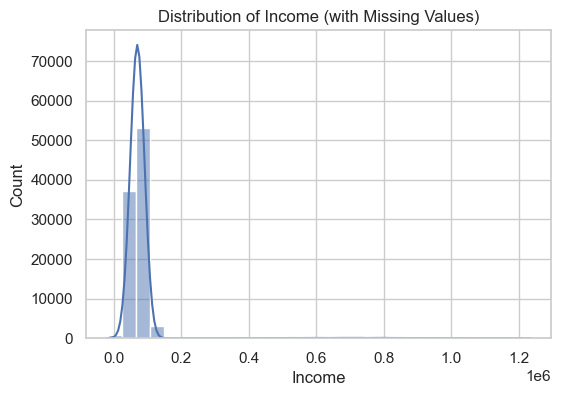

Saved: ..\..\reports\figures\Income_distribution.png


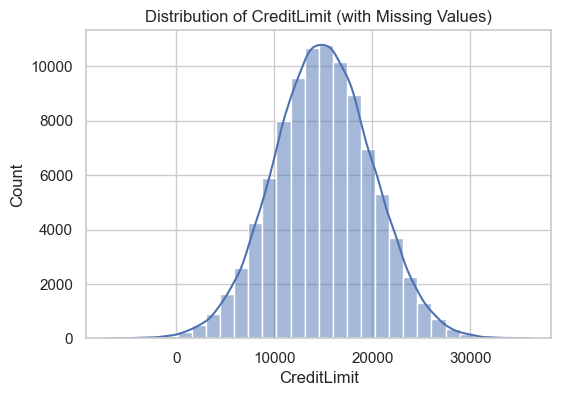

Saved: ..\..\reports\figures\CreditLimit_distribution.png


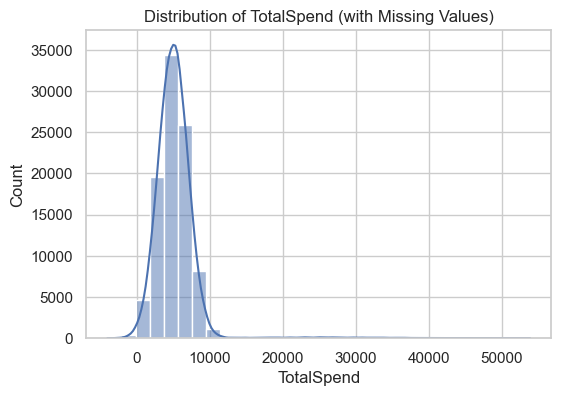

Saved: ..\..\reports\figures\TotalSpend_distribution.png


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

figures_dir = Path("../../reports/figures")
figures_dir.mkdir(parents=True, exist_ok=True)

cols_with_missing = ["Income", "CreditLimit", "TotalSpend"]

for col in cols_with_missing:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (with Missing Values)")
    
    # Save figure
    save_path = figures_dir / f"{col}_distribution.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    
    # Show plot
    plt.show()

    print(f"Saved: {save_path}")

*Since `Income` and `TotalSpend` were highly right-skewed, I will use median imputation to avoid distortion from outliers. `CreditLimit` was nearly symmetric, so I will use mean imputation to preserve its distribution.*

In [17]:
# Median for skewed features
df["Income"] = df["Income"].fillna(df["Income"].median())
df["TotalSpend"] = df["TotalSpend"].fillna(df["TotalSpend"].median())

# Mean for symmetric feature
df["CreditLimit"] = df["CreditLimit"].fillna(df["CreditLimit"].mean())

In [18]:
df[["Income", "CreditLimit", "TotalSpend"]].isnull().sum()

Income         0
CreditLimit    0
TotalSpend     0
dtype: int64

In [19]:
df.describe()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.508690,7.590712e+04,14981.859704,99.992140,5191.245954,9.999980,0.049600,0.004126,-0.000928,-0.000206,...,0.003642,-0.002959,-0.004823,0.001613,0.000034,0.004805,-0.000070,0.002058,-0.004414,-0.000516
std,10.012717,6.632278e+04,4879.319420,9.997949,2897.125512,5.464637,0.217118,1.001098,0.999190,0.999999,...,0.999668,1.001941,1.000437,1.000040,1.001894,0.999132,0.998031,1.001715,1.003980,0.998066
min,0.000000,-1.827772e+04,-7021.069804,61.000000,-4005.132671,1.000000,0.000000,-4.357991,-4.231399,-4.153703,...,-4.113981,-4.849129,-4.486861,-4.342730,-4.395101,-4.312835,-4.304543,-4.361010,-4.287676,-4.279205
25%,38.000000,5.746005e+04,11815.257665,93.000000,3743.367280,5.000000,0.000000,-0.672855,-0.674246,-0.670267,...,-0.669973,-0.673030,-0.679973,-0.670967,-0.675078,-0.669367,-0.676075,-0.677120,-0.682738,-0.673527
50%,45.000000,7.026261e+04,14981.859704,100.000000,5029.232703,10.000000,0.000000,0.003265,-0.005114,0.001596,...,0.001217,-0.005589,-0.006657,0.000640,-0.000693,0.007728,-0.000571,0.003497,-0.003215,-0.001073
75%,51.000000,8.312253e+04,18139.629064,107.000000,6313.298848,15.000000,0.000000,0.674985,0.677243,0.674857,...,0.674990,0.668663,0.672068,0.677454,0.679025,0.677158,0.671080,0.676723,0.675218,0.670989
max,89.000000,1.233744e+06,36096.831719,146.000000,53896.734185,19.000000,1.000000,4.441448,4.381350,4.253646,...,4.338037,4.113717,4.101093,4.357028,4.522098,4.394473,4.278007,4.270151,4.301758,4.890074


## 4. Checking for Outliers

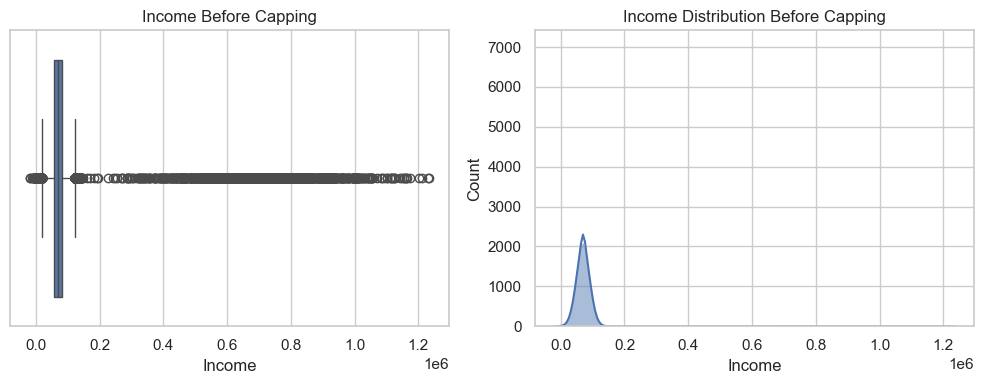

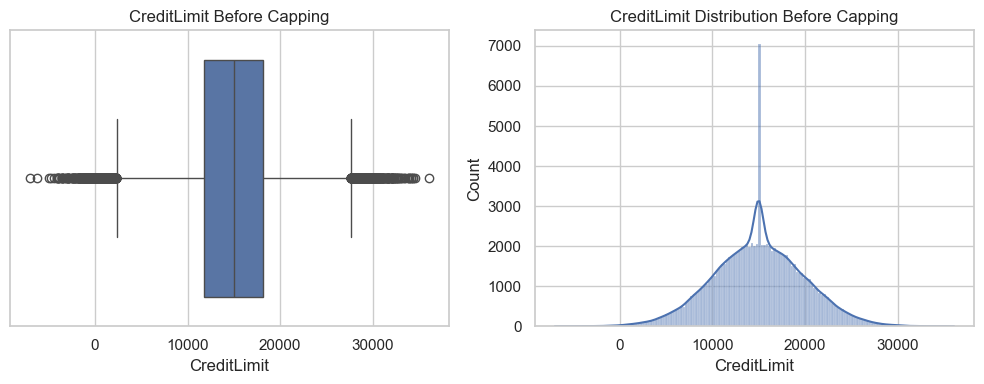

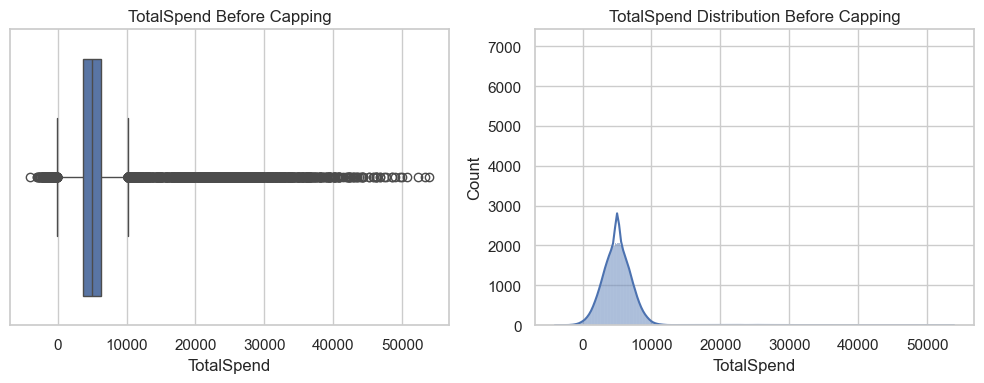

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

figures_dir = Path("../../reports/figures/outliers")
figures_dir.mkdir(parents=True, exist_ok=True)

for col in ["Income", "CreditLimit", "TotalSpend"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"{col} Before Capping")
    
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f"{col} Distribution Before Capping")
    
    plt.tight_layout()
    plt.savefig(figures_dir / f"{col}_before_capping.png", dpi=300, bbox_inches="tight")
    plt.show()

In [21]:
import numpy as np
import pandas as pd

def cap_outliers_iqr(df, cols):
    """
    Caps outliers in specified numeric columns using the IQR method.
    
    Parameters:
    df (DataFrame): Input dataframe
    cols (list): List of numeric columns to process
    
    Returns:
    DataFrame: Dataframe with capped outliers
    """
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside the bounds
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))
        
        print(f"{col}: capped values outside [{lower_bound:.2f}, {upper_bound:.2f}]")
        
    return df

# Identify numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols.remove("AttritionFlag")  # exclude target

# Apply IQR capping
df = cap_outliers_iqr(df, numeric_cols)

Age: capped values outside [18.50, 70.50]
Income: capped values outside [18966.33, 121616.24]
CreditLimit: capped values outside [2328.70, 27626.19]
TotalTransactions: capped values outside [72.00, 128.00]
TotalSpend: capped values outside [-111.53, 10168.20]
Tenure: capped values outside [-10.00, 30.00]
Feature_0: capped values outside [-2.69, 2.70]
Feature_1: capped values outside [-2.70, 2.70]
Feature_2: capped values outside [-2.69, 2.69]
Feature_3: capped values outside [-2.71, 2.70]
Feature_4: capped values outside [-2.70, 2.71]
Feature_5: capped values outside [-2.69, 2.69]
Feature_6: capped values outside [-2.70, 2.70]
Feature_7: capped values outside [-2.71, 2.71]
Feature_8: capped values outside [-2.69, 2.69]
Feature_9: capped values outside [-2.69, 2.70]
Feature_10: capped values outside [-2.69, 2.70]
Feature_11: capped values outside [-2.69, 2.69]
Feature_12: capped values outside [-2.68, 2.69]
Feature_13: capped values outside [-2.70, 2.70]
Feature_14: capped values outsid

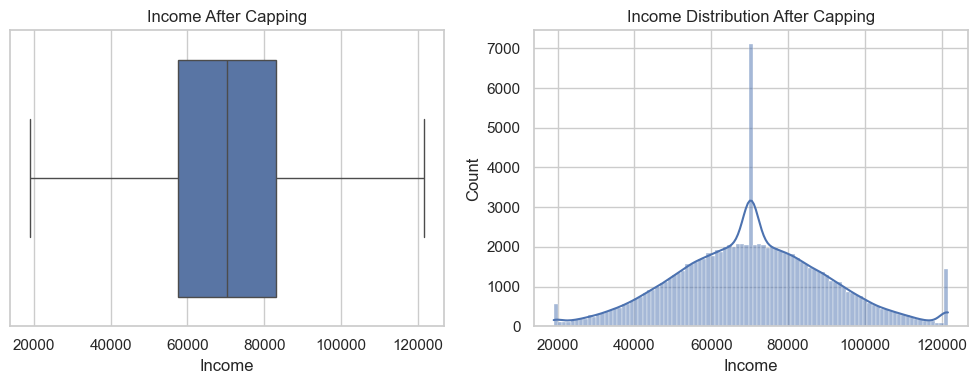

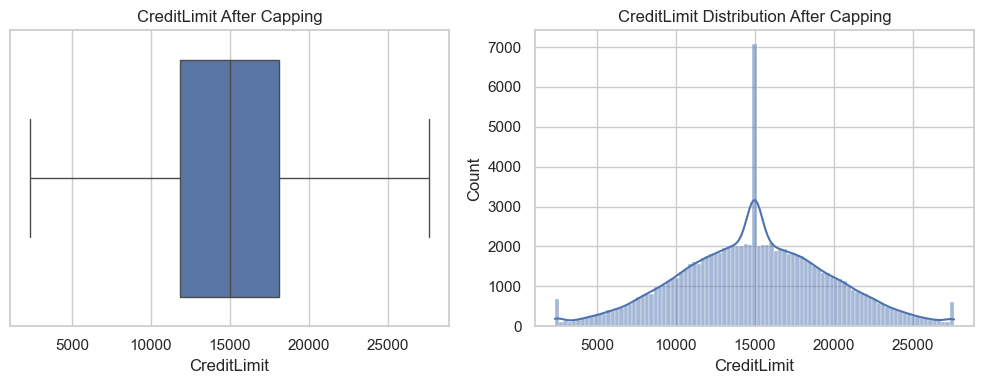

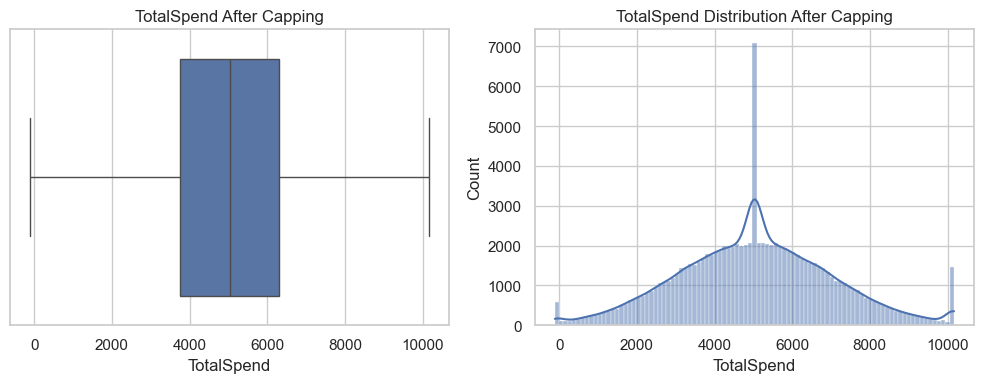

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# figures_dir = Path("../../reports/figures/outliers")
# figures_dir.mkdir(parents=True, exist_ok=True)

for col in ["Income", "CreditLimit", "TotalSpend"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"{col} After Capping")
    
    sns.histplot(df[col], kde=True, ax=axes[1])
    axes[1].set_title(f"{col} Distribution After Capping")
    
    plt.tight_layout()
    # plt.savefig(figures_dir / f"{col}_after_capping.png", dpi=300, bbox_inches="tight")
    plt.show()


*I detected outliers using the IQR method and capped them instead of removing them to preserve dataset size while reducing the influence of extreme values. This is particularly important for financial datasets where high values can be genuine but shouldn’t overly bias the model.*